In [6]:
import pandas as pd
import altair as alt
import seaborn as sns
from vega_datasets import data

happy = pd.read_csv("Datasets/2019.csv")

In [8]:
## Link to dataset: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

In [ ]:
## Scroll down all the way at the end for my comments :)

In [2]:
happy.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
countries = alt.topo_feature(data.world_110m.url, 'countries')

map1 = alt.Chart(countries).mark_geoshape().encode(
  color='Score:Q',
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(happy, 'id', ['Score'])
).project(
    "naturalEarth1"
).properties(
    width=1000,
    height=700,
    title="Map of world's happiest countries"
)

map2 = alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(
    "naturalEarth1"
).properties(
    width=700,
    height=500
)

map3 = map2 + map1

map3

alt.LayerChart(...)

In [8]:
## Does money buy happiness?

selection = alt.selection_multi(fields=['Continent'])
dom = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
rng = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', 'gold', '#ff7f00']

continent_color = alt.condition(selection,    # Set the color to change depending on a the selection
      alt.Color("Continent:N", scale=alt.Scale(domain=dom, range=rng),legend=None),
      alt.value("lightgray"))

scatterplot = alt.Chart(happy).mark_circle(opacity=0.9).encode(
  x=alt.X("GDP per capita:Q",axis=alt.Axis(title='GDP per capita, scaled')),
  y="Score:Q",
  color=continent_color,
  tooltip=['Country', 'Score', 'Overall rank']
).properties(
  title='Does money (in GDP per capita) buy happiness?'
).add_selection(selection).interactive()

legend = alt.Chart(happy).mark_rect().encode(
    y=alt.Y("Continent:N", axis=alt.Axis(orient="right")),
    color=continent_color
).add_selection(selection) # We now add it to the legend instead, since that is what the viewer interacts with

GDPscatter = scatterplot | legend

GDPscatter
GDPscatter.save('GDPscatter.html')

ValueError: Country encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

In [9]:
happy["Score"].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

c:\Users\jackk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

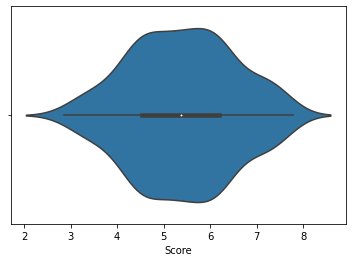

In [10]:
sns.violinplot(happy["Score"])

In [11]:
happy["Score"].corr(happy["GDP per capita"])

0.7938828678781273

In [13]:
happy["Score"].corr(happy["Social support"])

0.7770577880638639

In [168]:
happy["Score"].corr(happy["Healthy life expectancy"])

0.7789642801336891

In [169]:
happy["Score"].corr(happy["Freedom to make life choices"])

0.5645765325627999

In [170]:
happy["Score"].corr(happy["Generosity"])

0.07768831243613275

In [171]:
happy["Score"].corr(happy["Perceptions of corruption"])

0.3835433573968561

In [ ]:
# Exploratory visualization

In [ ]:
In my map, the data that is being recorded is a map that colors each country based on their world happiness score. The mark is the world map and the channel is color. Light green represents the lowest scores, and dark blue/purple represents the highest scores. The total score is a sum of 6 different factors: GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. The GDP per capita is a scaled number, and the other 5 factors use data from the Gallup World Poll. I am hoping to learn which countries are generally most happy, and which factors affect the happiness ranking. Some data that is left out is data from 40 other countries and other factors that contribute to the happiness score.

After creating the map, I used Pandas to find summary statistics for the total score column in my dataset. I found that out of 155 countries, the average score is 5.41. The 25% value is 4.55, the 50% value is 5.39, and the 75% value is 6.19. Since the mean and median are very similar values, the data is evenly spread out for the most part.

In [ ]:
# Explanatory visualization

In [ ]:
This visualization is a scatterplot that analyzes GDP per capita (scaled) vs the total happiness score. Furthermore, I designed the scatterplot such that you can click on the continents listed on the legend and see where all data points for that continent lie within the scatterplot. I chose to visualize GDP per capita vs. score because I wanted to see how a country’s GDP per capita affects a country’s happiness score. The marks of this graph are points and the tooltips, and the channels are the vertical + horizontal positions and colors. The points and positions are pretty self explanatory for the scatterplot, but I wanted to include color in my scatterplot to differentiate between different continents. In addition, I wanted to add a tooltip so that the user can identify which country represents that specific data point, as well as their score and overall rank.

After I created the scatterplot, I found that the value of correlation between GDP per capita and the score is 0.795. This got me thinking. What about the other factors’ correlation to the score? The values of correlations are as follows: Social support vs score = 0.778; Healthy life expectancy vs score = 0.779; Freedom to make life choices = 0.565; Generosity = 0.078; Perceptions of corruption = 0.384. This means that GDP per capita best correlates with a country’s happiness ranking (out of all of the listed factors).

In [ ]:
# Reflection

In [ ]:
In my lab, I prioritized working on my map. I really had a lot of fun creating the map because I thought it would be really cool to visualize my data cartographically. However, since this is something that we hadn’t done in class, I spent a lot of time learning how to create a map. I had to import vega datasets to access the world map. Furthermore, I had to manually input the country id for every single row of data so that the computer could understand which country the dataset is referring to. After many hours and attempts, I was finally able to produce that map. (I didn’t mind spending all the time on this map, since it looks awesome). For my scatterplot, I also had to manually input the continent of each country so I could use the legend to color-code each datapoint and use the legend to click on where each continent’s data points are. For the long term project, I would like to learn more types of graphs I can make using Altair or other modules. So, I will have a greater variety of graphs to work with in my final report.

